# *Cosmos* via Natural Language Processing, by Sung Been Lee

*Cosmos* is a popular science television series written and presented by astronomer and astrophysicist Carl Sagan in which he explored a wide range of scientific subjects, including the origins of the universe, the development of life on Earth, and the search for extraterrestrial life. In addition to its educational value, it is significant for its cultural impact, as the series was widely watched and became a cultural phenomenon with Sagan's distinctive presentation style becoming widely recognized and imitated. The series has been credited with helping to popularize the study of science and inspiring many people to pursue careers in science and related fields.

In this project, I will be exploring what insights a computer might be able to gain about *Cosmos*, through various machine learning techniques. The contents of the book is saved as a .txt file named cosmos_by_carl_sagan.txt in the local directory.

## Data Import & Cleaning

To begin, cosmos_by_carl_sagan.txt will be brought into the workspace.

In [1]:
file = open("cosmos_by_carl_sagan.txt", "r") # read in the book
s = ''.join(file.readlines()) # concatenate each line of the book into string s
s = s.replace("\n", "") # remove line breaks
len(s) # show length of s

750807

As evident in the output of `len(s)` above, `s` contains the entire text data within *Cosmos*. The line below displays the first 200 characters of `s`.

In [2]:
s[:200] 

'Spacecraft missions to nearby Planets The Library of ancient Alexandria The human brain Egyptian Hieroglyphics The origin of life The death of the Sun The evolution of galaxies The origins of matter, '

### Split into chapters
Since the chapters are demaracted by the all-caps word "CHAPTER", `s` will be split on this word to break the text data into chapters. I will be excluding contents of the book before the first chapter as this part of the book is not directly relevant to the main contents of the book.

In [3]:
chapters = s.split("CHAPTER")[1:] # get rid of text before chapter 1
len(chapters) # show length of chapters

13

As seen in the output above, there are a total of 13 chapters. The texts of each chapter will be organized in a `pandas` data frame. The data frame will have two columns: `Chapters` and `Texts`. `Chapters` will contain each of the chapters as integers, and `Texts` will contain the corresponding text data of each of the chapters.

In [4]:
import pandas as pd

df = pd.DataFrame({
    "Chapters":range(1, len(chapters)+1),
    "Texts":chapters
})

df # show df

,Chapters,Texts
0,1,I The Shores of the Cosmic Ocean The first me...
1,2,II One Voice in the Cosmic Fugue I am bidden ...
2,3,III The Harmony of Worlds Do you know the ord...
3,4,IV Heaven and Hell Nine worlds I remember. - ...
4,5,V Blues for a Red Planet In the orchards of t...
5,6,VI Travelers’ Tales Do there exist many world...
6,7,VII The Backbone of Night They came to a roun...
7,8,VIII Travels in Space and Time No one has liv...
8,9,IX The Lives of the Stars Opening his two eye...
9,10,X The Edge of Forever There is a thing confus...


Next, I am going to use the `CountVectorizer` function from the `sklearn.feature_extraction.text` module. This function will turn the unstructured text into quantitative numbers that can be fed into algorithms. 

The `CountVectorizer` object will be applied on `df` and stored into `vec`. I have specified the `stop_words`* argument to `"english"`. 

**a stop word is a word that is considered uninteresting for the purposes of natural language processing, for instance, "she," "can", and "the"*.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

vec = CountVectorizer(stop_words = "english")
counts = vec.fit_transform(df['Texts']) # create a term-document matrix on the text data

type(counts) # show type of counts

scipy.sparse.csr.csr_matrix

`counts` represents the term-document matrix. However, as shown in the code above, its type is `scipy.sparse.csr.csr_matrix`, which makes it difficult to work with. For this reason, I will be converting it to a `numpy` array with the `toarray()` method.

In [6]:
counts = counts.toarray()
type(counts)

numpy.ndarray

In [7]:
counts.shape # dimension of counts

(13, 11286)

Now that the term-document matrix is synthesized, I will be converting `counts` into a data frame with labeled columns, each column name representing a word that appears in the book. This will be done using the `get_feature_names_out()` method.

In [8]:
count_df = pd.DataFrame(counts, columns = vec.get_feature_names_out())
count_df

,000,000a,01,018,0329,04,10,100,1000,1000a,...,zest,zeus,zhou,zodiac,zodiacal,zone,zones,zoo,zoroaster,zoroastrian
0,12,0,0,0,0,0,7,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,1,1,0,0,...,0,0,0,2,0,0,0,0,0,1
3,10,1,0,0,0,0,20,3,0,1,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,5,2,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,5,0,0,0,0,0,0,0,1,0,...,1,4,0,0,0,0,0,0,1,0
7,9,0,1,0,0,0,8,0,0,0,...,0,0,0,1,1,0,0,1,0,0
8,39,0,0,0,1,0,16,3,2,0,...,0,0,0,0,0,1,0,0,0,0
9,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


Now that a term-document matrix in the form of a data frame is created, it will be concatenated with the original data frame with chapter and text data. In addition, columns that represent non-English words such as 000, 000a01, and 10, will be removed from the data frame.

In [9]:
df = pd.concat((df,count_df), axis = 1)
df = df.drop(columns = df.columns[2:243])
df.head(5) # show first 5 observations

,Chapters,Texts,abalone,abandon,abandoned,abbott,abdera,aberration,abide,abiding,...,zest,zeus,zhou,zodiac,zodiacal,zone,zones,zoo,zoroaster,zoroastrian
0,1,I The Shores of the Cosmic Ocean The first me...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,2,II One Voice in the Cosmic Fugue I am bidden ...,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,III The Harmony of Worlds Do you know the ord...,0,2,1,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,1
3,4,IV Heaven and Hell Nine worlds I remember. - ...,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5,V Blues for a Red Planet In the orchards of t...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Interpreting the Term-Document Matrix

Now that the data frames are concatenated and cleaned, the term-document matrix can be used to check how frequently a given term appears in each chapter of the novel by indexing the term as a column. For instance, the code below displays how many times the word 'human' appeared in each capter of the book.

In [10]:
df[['Chapters','human']]

,Chapters,human
0,1,6
1,2,19
2,3,12
3,4,9
4,5,20
5,6,15
6,7,17
7,8,12
8,9,3
9,10,5


Now, I will use `matplotlib` to visualize how words like 'cosmos', 'time', 'human', 'stars', 'universe', and 'god' appear throughout the book. Note that there are no inherent significance of these words—these are just words that I personally find interesting in relation to the theme of the book.

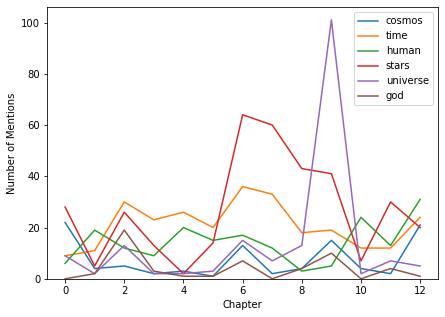

In [11]:
from matplotlib import pyplot as plt

words = ['cosmos','time','human','stars','universe','god']
fig, ax = plt.subplots(1, figsize = (7,5))

# plot each word on the figure
for word in words:
    ax.plot(df[word], label = word)

ax.set(ylim = (0, None),
       ylabel = "Number of Mentions",
       xlabel = "Chapter")

ax.legend()

As evident in the figure above, the words of interest appear many times throughout the chapters, but certain chapters mention them more freqently than others. Specifically, 'stars' is mentioned substantially more frequently in chapters 6 through 9 than in other chapters and, perhaps most notably, 'universe' appears to be a distinctively salient in chapter 9, as it is mentioned dramatically more in the chapter than in other chapters. 

This leads me to hypothesize that this is due to the fact that in the later chapters, Dr. Sagan discusses the broader implications of the scientific findings explored in the earlier chapters, making use of words like 'universe' more regularly. In the next section, I will be evaluating the accuracy of this hypothesis with topic modeling.

## Topic Modeling

In this section, I will be using `scikit-learn` to perform topic modeling, a type of unsuprivised machine learning technique that automatically extracts the main topics from a collection of documents. The overall aim of this section is to get a coarse, topic-level summary of the plot of *Cosmos*.

To begin, I will redefine `df` as a data frame that contains the `Chapters` and `Texts` columns—how it origianlly was before the term-document matrix.

In [12]:
df = pd.DataFrame({
    "Chapters":range(1,len(chapters)+1),
     "Texts":chapters
})

df

,Chapters,Texts
0,1,I The Shores of the Cosmic Ocean The first me...
1,2,II One Voice in the Cosmic Fugue I am bidden ...
2,3,III The Harmony of Worlds Do you know the ord...
3,4,IV Heaven and Hell Nine worlds I remember. - ...
4,5,V Blues for a Red Planet In the orchards of t...
5,6,VI Travelers’ Tales Do there exist many world...
6,7,VII The Backbone of Night They came to a roun...
7,8,VIII Travels in Space and Time No one has liv...
8,9,IX The Lives of the Stars Opening his two eye...
9,10,X The Edge of Forever There is a thing confus...


Next, I will again use `CountVectorizer` to create a term-document matrix. However, in this case, because the aim is to visualize how certain topics evolve across chapters, I will use the `max_df` argument to only include words that appear in at most 70% of the chapters, expressed as `max_df = .7`.  The `min_df` argument will be set to `0`.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(max_df = .7, min_df = 0, stop_words = "english")

Now, `vec` will be used to create the term-document matrix and collect it all as a data frame. Because of the `max_df = .7` argument of the `CountVectorizer` method, the number of words (columns) to remove from the data frame is now `df.columns[2:241]`, as the first two columns (`Chapters` and `Texts`) need to be preserved, and the other non-english words need to be removed. 

In [14]:
counts = vec.fit_transform(df['Texts'])
counts = counts.toarray()
count_df = pd.DataFrame(counts, columns = vec.get_feature_names_out())
df = pd.concat((df,count_df), axis = 1)
df = df.drop(columns = df.columns[2:241])

df.head(5)

,Chapters,Texts,abalone,abandon,abandoned,abbott,abdera,aberration,abide,abiding,...,zest,zeus,zhou,zodiac,zodiacal,zone,zones,zoo,zoroaster,zoroastrian
0,1,I The Shores of the Cosmic Ocean The first me...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,2,II One Voice in the Cosmic Fugue I am bidden ...,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,III The Harmony of Worlds Do you know the ord...,0,2,1,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,1
3,4,IV Heaven and Hell Nine worlds I remember. - ...,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5,V Blues for a Red Planet In the orchards of t...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Because topic modeling is a form of unsupervised machine learning, I will only need to define `X`, the predictor data, as shown below. `X` must not contain columns `['Chapters','Texts']` as only the term-document matrix portion of the data frame will be fed into the algorithm.

In [15]:
X = df.copy()
X = X.drop(['Chapters','Texts'], axis = 1) # remove these columns
X.head(5)

,abalone,abandon,abandoned,abbott,abdera,aberration,abide,abiding,abilities,ability,...,zest,zeus,zhou,zodiac,zodiacal,zone,zones,zoo,zoroaster,zoroastrian
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,1,0,0,0,0,0,0,2,...,0,0,0,2,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


There are many algorithms for topic modeling, but in this project I will use nonnegative matrix factorization, or NMF.

NMF decomposes the term-document matrix into topics. It starts with a matrix $X\sim\text{documents}\times \text{words}$. Then it factors $X=WH$ where $W=\text{documents}\times \text{topics}$ and $H=\text{topics}\times\text{words}$. 

In other words, the frequency of each word in every document is observed prior to factorization. Once the factorization is complete, the strength of association between a word and a specific topic, as well as the strength of association between a topic and a particular document, are evaluatd.

This process can be broken down into three steps: 

1. Import the desired model. 
2. Initialize an instance of the model. 
3. Fit the model on data. 

NMF requires the `n_components` argument to be defined, which is the number of topics to find. `topic_count` will represent the number of topics to find, which in this case is 6.

In [16]:
from sklearn.decomposition import NMF

topic_count = 6

model = NMF(n_components = topic_count, init = "random", random_state = 0)
model.fit(X)

NMF(init='random', n_components=6, random_state=0)

The topics are stored in the `components_` attribute of the model. 

In [17]:
model.components_ # show components_ of the model

array([[0.00000000e+00, 4.38327998e-04, 5.87630311e-01, ...,
        5.69921708e-03, 0.00000000e+00, 8.12735934e-03],
       [2.57911015e-01, 0.00000000e+00, 1.17641114e-01, ...,
        5.35679973e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.23148239e-02, 0.00000000e+00, 2.47897842e-03],
       [0.00000000e+00, 8.23434995e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 8.50726610e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.49517105e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.38439934e+00, 1.70545305e+00, ...,
        1.10542798e-01, 4.20720050e-01, 4.81282563e-01]])

In [18]:
model.components_.shape # show shape of the model's components_

(6, 10691)

As seen in the output above, each row represents a distinct component. Each component can be thought of as a collection of weights for each word.

The most important words in each component can be found by identifying the words with the highest weights within that component. This will be accomplished using the `np.argsort()` function, which indicates the entries of an array that are the largest, second largest, and so on.

In [19]:
orders = np.argsort(model.components_, axis = 1)
orders # show orders

array([[    0,  5743,  5742, ...,  1744,  1742, 10300],
       [ 5345,  5723,  5722, ..., 10424,  6406,  1594],
       [    0,  5895,  5894, ..., 10393,  4669,  5281],
       [    0,  6253,  6252, ..., 10333,  5770,  5767],
       [    0,  6187,  6186, ...,  9327,  7513,   666],
       [    0,  4577,  4573, ...,   897,  3773,  6118]])

The words are then arranged by `orders`.

In [20]:
important_words = np.array(X.columns)[orders]
important_words # show the words as arranged by orders

array([['abalone', 'manuscript', 'manufactures', ..., 'comets', 'comet',
        'venus'],
       ['konigsberg', 'maneuver', 'manetho', ..., 'war', 'nuclear',
        'civilization'],
       ['abalone', 'messages', 'message', ..., 'voyager', 'huygens',
        'jupiter'],
       ['abalone', 'navigators', 'navigations', ..., 'viking', 'martian',
        'mars'],
       ['abalone', 'mutating', 'mustering', ..., 'supernova', 'protons',
        'atoms'],
       ['abalone', 'honors', 'hominid', ..., 'believed', 'flame',
        'motion']], dtype=object)

Because this process will be applied iteratively, a function will be defined.

In [21]:
def top_words(X, model, component, num_words):
    orders = np.argsort(model.components_, axis = 1)
    important_words = np.array(X.columns)[orders]

    return important_words[component][-num_words:]

Assigning topics to each document based on weights is an important aspect of topic modeling, and this will be done with the `transform()` method of the model.

In [22]:
weights = model.transform(X)
weights[:3]

array([[0.01850533, 0.22878405, 0.07659417, 0.        , 0.05508537,
        0.119826  ],
       [0.00883732, 0.63032278, 0.07774356, 0.05489606, 0.2476392 ,
        0.01076627],
       [0.06640471, 0.        , 0.04856012, 0.06798911, 0.        ,
        1.11583166]])

`weights` can be visualized, via `matplotlib`.

[Text(0.5, 0, 'Chapters'), Text(0, 0.5, 'Topic')]

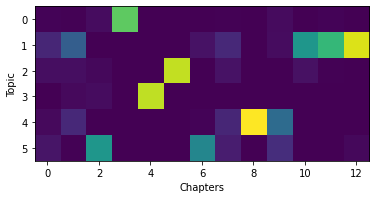

In [23]:
fig, ax = plt.subplots(1)

ax.imshow(weights.T)
ax.set(xlabel = "Chapters",
       ylabel = "Topic")

The weights indicate the relative presence of each topic in each chapter. For instance, Topics 2 and 3 are highly present in chapters 4 and 5, and topic 1 becomes increasingly more presenent throughout chapters 10 through 12.

The weights will now be visualized as a line chart. In addition, labels featuring some of the top words for each topic will be added.

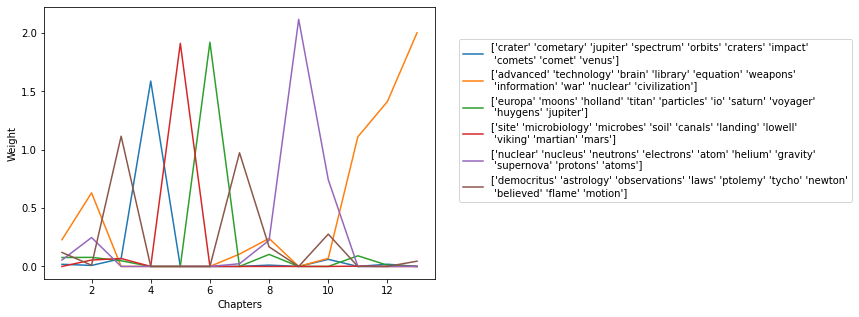

In [24]:
fig, ax = plt.subplots(1, figsize = (7,5))

for i in range(topic_count):
    ax.plot(df['Chapters'], weights[:,i], label = top_words(X,model,i,10))

ax.set(xlabel = "Chapters",
       ylabel = "Weight")
ax.legend(bbox_to_anchor=(1.05,.9),loc='upper left')

As evident in the figure above, my initial hypothesis is supported by the data: in the later chapters (11 through 13) Dr. Sagan explores the broader implications of the scientific findings he discusses in the earlier chapters, as seen in the orange line that represents the topic most closely related to words like 'advanced', 'technology', 'weapons', 'information', 'war', 'nuclear', and 'civilization', which are far more introspective and imaginative than the other salient words. 

Dr. Sagan's message in these chapters is significant in regards to the book as a whole because it emphasizes the interconnectedness of all life in the universe and the importance of understanding our place within it. He encourages us to think beyond our own planet and consider the possibility of life elsewhere in the cosmos. Dr. Sagan's work in *Cosmos* is a call to action for humanity to embrace scientific curiosity and pursue knowledge for the betterment of all.